Generate Data

AxesSubplot(0.125,0.125;0.62x0.755)
  X   Y  value
 47  85     -1
 42  82     -1
  2  74     -1
 96  22      1
 66  98     -1
 50   4      1
 39  86     -1
 27  66     -1
 58  22      1
 37   2      1
  8  66     -1
 94  25      1
 68  12      1
 29  78     -1
 92  18      1
 26  72     -1
 96  28      1
 93   5      1
 20  76     -1
 50  89     -1
  2  66     -1
 11  95     -1
 48  80     -1
 87  34      1
 81  25      1
 23  68     -1
  3  57     -1
 65  96     -1
 81   5      1
 35  72     -1
 28  91     -1
  2 100     -1
 38  81     -1
 19  77     -1
 86  39      1
 28  78     -1
 64  17      1
 54   6      1
100   2      1
 22  69     -1
 39  70     -1
 93  43      1
 65  31      1
 57  18      1
 43 100     -1
 78  32      1
 59  24      1
 12  48     -1
 66  18      1
 98   8      1


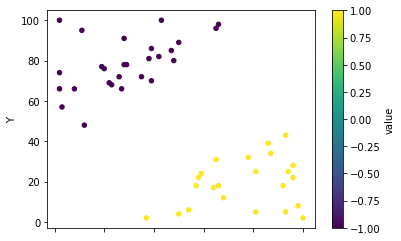

In [1]:
import random
import time
import pandas as pd

w,h = 2,50
data = [[0 for x in range(w)] for y in range(h)] 

random.seed(time.time())

linearly_separable = True
min_dist_btwn_points = 30

# Initialize points and their values
for i in range(50):
    
    #Create random data point
    data[i][0] = random.randint(1,100)
    data[i][1] = random.randint(1,100)
    
    while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
        #do it again, we don't want it too close to the line
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)
    
    # Point's position relative to x = y line determines value        
    if (data[i][0] >=  data[i][1]):
        data[i].append(1)
    else:
        data[i].append(-1)
        
    # unless we don't want it to be specifically linearly separable
    # then 10% of the time switch the value up
    if (not linearly_separable and random.randint(1,10) % 10):
        data[i][2] *= -1
    

df = pd.DataFrame(data, columns=("X", "Y", "value"))
print(df.plot.scatter(x="X", y="Y", c="value", cmap='viridis'))
print(df.to_string(index=False))

PLA Algorithm

In [2]:
import numpy as np
def pla(x, y, step_size, passes, prediction):
    w=[0,0,0]
    for c in range(passes):
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0: #prediction and the sign of weight vector * points are opposites
                updated = True
                updatePiece = [step_size*y[i]*coord for coord in x[i]]
                w = [sum(i) for i in zip(*[w,updatePiece])]
        if not updated:
            break
    
    if updated == False:
        print("first solution found")
    else:
        print("no solution or first solution found but not verified in the last pass")
    return w
                    

Run PLA algorithm

In [3]:
import numpy as np
prediction = np.zeros(50)

#separate the points from values for sake of pla
values=[]
points=[]
for i in range(len(data)):
    values.append(data[i][2])
    points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points
    
result = pla(points, values, 1, 100, prediction)
print(result)

first solution found
[0, 49, -63]


Plot Results

[0, 0.0]   [100, 77.77777777777777]


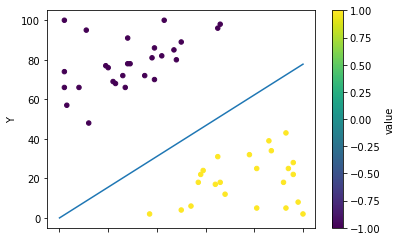

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

def findPointOnLine(weights, x):
    # weights[0] + weights[1]*(x) + weights[2]*(y) = 0
    y = (-1*weights[0]) - weights[1]*x / weights[2]
    return [x, y]

# two points are required to plot the line
point1 = findPointOnLine(result, 0)
point2 = findPointOnLine(result, 100)
xvals = [point1[0], point2[0]] 
yvals = [point1[1], point2[1]]

#plot data
df = pd.DataFrame(data, columns=("X", "Y", "value"))
df.plot.scatter(x="X", y="Y", c="value", cmap='viridis') # plot points
plt.plot(xvals, yvals) # plot decision line
print(point1, " ", point2)